In [13]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

<h3>Understanding the Dataset 💽</h3>


In [14]:
data_path = 'Crop and fertilizer dataset.csv'
df = pd.read_csv(data_path)

In [15]:
df.head()

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link
0,Kolhapur,Black,75,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
1,Kolhapur,Black,80,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
2,Kolhapur,Black,85,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
3,Kolhapur,Black,90,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
4,Kolhapur,Black,95,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District_Name  4513 non-null   object 
 1   Soil_color     4513 non-null   object 
 2   Nitrogen       4513 non-null   int64  
 3   Phosphorus     4513 non-null   int64  
 4   Potassium      4513 non-null   int64  
 5   pH             4513 non-null   float64
 6   Rainfall       4513 non-null   int64  
 7   Temperature    4513 non-null   int64  
 8   Crop           4513 non-null   object 
 9   Fertilizer     4513 non-null   object 
 10  Link           4513 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 388.0+ KB


In [17]:
df['Crop'].value_counts()

Sugarcane    1010
Wheat         859
Cotton        650
Jowar         394
Maize         350
Rice          309
Groundnut     177
Tur           126
Ginger        125
Grapes        125
Urad           99
Moong          99
Gram           78
Turmeric       55
Soybean        45
Masoor         12
Name: Crop, dtype: int64

In [18]:
df = df.drop(['Link'], axis=1)

In [19]:

df = df.drop(['Soil_color'], axis=1)

In [20]:
df.head()
df.tail()

,District_Name,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer
4508,Pune,130,80,150,7.0,1400,30,Sugarcane,MOP
4509,Pune,135,80,150,7.0,1400,30,Sugarcane,MOP
4510,Pune,140,80,150,7.0,1400,30,Sugarcane,MOP
4511,Pune,145,80,150,7.0,1400,30,Sugarcane,MOP
4512,Pune,150,80,150,7.0,1400,30,Sugarcane,MOP


In [21]:
print(f"Rows, Cols = {df.shape}")
print(f"Rows * Cols = {df.size}")

Rows, Cols = (4513, 9)
Rows * Cols = 40617


In [22]:
# The features of our dataset
df.columns

Index(['District_Name', 'Nitrogen', 'Phosphorus', 'Potassium', 'pH',
       'Rainfall', 'Temperature', 'Crop', 'Fertilizer'],
      dtype='object')

In [23]:
# The labels on which recommendation will be performed
df['District_Name'].unique()


array(['Kolhapur', 'Solapur', 'Satara', 'Sangli', 'Pune'], dtype=object)

In [24]:
df['Crop'].unique()

array(['Sugarcane', 'Jowar', 'Cotton', 'Rice', 'Wheat', 'Groundnut',
       'Maize', 'Tur', 'Urad', 'Moong', 'Gram', 'Masoor', 'Soybean',
       'Ginger', 'Turmeric', 'Grapes'], dtype=object)

In [25]:
crop_summary = pd.pivot_table(df,index=['Crop'],aggfunc='mean')
crop_summary.head()

C:\Users\TUF\AppData\Local\Temp\ipykernel_18540\3645134560.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  crop_summary = pd.pivot_table(df,index=['Crop'],aggfunc='mean')


,Nitrogen,Phosphorus,Potassium,Rainfall,Temperature,pH
Crop,,,,,,
Cotton,117.615385,56.730769,60.769231,827.692308,28.076923,6.956154
Ginger,50.000000,50.000000,70.000000,948.000000,27.200000,5.980000
Gram,34.615385,39.615385,21.153846,719.230769,23.269231,6.480769
Grapes,90.000000,50.000000,130.000000,748.000000,24.800000,6.720000
Groundnut,29.406780,41.440678,27.881356,694.915254,27.711864,6.508475


In [26]:
import random
crop_summary_N = crop_summary.sort_values(by='Nitrogen', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_N['Nitrogen'][0:10].sort_values().index,
    'x' : crop_summary_N['Nitrogen'][0:10].sort_values()
}

last = {
    'y' : crop_summary_N['Nitrogen'][-10:].index,
    'x' : crop_summary_N['Nitrogen'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [27]:
crop_summary_P = crop_summary.sort_values(by='Phosphorus', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_P['Phosphorus'][0:10].sort_values().index,
    'x' : crop_summary_P['Phosphorus'][0:10].sort_values()
}

last = {
    'y' : crop_summary_P['Phosphorus'][-10:].index,
    'x' : crop_summary_P['Phosphorus'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorus (P)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [28]:
crop_summary_K = crop_summary.sort_values(by='Potassium', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_K['Potassium'][0:10].sort_values().index,
    'x' : crop_summary_K['Potassium'][0:10].sort_values()
}

last = {
    'y' : crop_summary_K['Potassium'][-10:].index,
    'x' : crop_summary_K['Potassium'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium (K)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [29]:
crop_summary_P = crop_summary.sort_values(by='Phosphorus', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_P['pH'][0:10].sort_values().index,
    'x' : crop_summary_P['pH'][0:10].sort_values()
}

last = {
    'y' : crop_summary_P['pH'][-10:].index,
    'x' : crop_summary_P['pH'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most pH required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least pH required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="pH",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [30]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['Nitrogen'],
    name='Nitrogen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['Phosphorus'],
    name='Phosphorous',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['Potassium'],
    name='Potassium',
    marker_color='crimson'
))

fig.update_layout(title="N, P, K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

In [31]:
fig = px.bar(crop_summary, x=crop_summary.index, y=["Rainfall", "Temperature"])
fig.update_layout(title_text="Comparision between rainfall, temperature",
                  plot_bgcolor='white',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [32]:
crop_scatter = df[(df['Crop']=='Cotton') | 
                      (df['Crop']=='Ginger') | 
                      (df['Crop']=='Gram') |
                     (df['Crop']=='Grapes') |
                     (df['Crop']=='Groundnut')|
                     (df['Crop']=='Jowar')|
                     (df['Crop']=='Maize')|
                     (df['Crop']=='Masoor')|
                     (df['Crop']=='Rice')|
                     (df['Crop']=='Soyabean')|
                     (df['Crop']=='Sugarcane')|
                     (df['Crop']=='Tur')|
                     (df['Crop']=='Turmeric')|
                     (df['Crop']=='Urad')|
                     (df['Crop']=='Wheat')|
                     (df['Crop']=='Moong')]

fig = px.scatter(crop_scatter, x="Rainfall", y="Temperature", color="Crop", symbol="Crop")
fig.update_layout(title="Scatter Plot", plot_bgcolor='white')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [33]:
# Making a heatmap of the dataset correlation : including only numerical data
linewidth = 2
linecolor = "black"

sns.heatmap(data=df.select_dtypes(include='number').corr(),
            annot=True, 
            linewidth = linewidth, 
            linecolor = linecolor)

In [ ]:
from sklearn.model_selection import train_test_split
features = df[['Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature']]
target = df['Crop']

xtrain, xtest, ytrain, ytest = train_test_split(features,
                                                target,
                                                test_size = 0.2,
                                                random_state = None)

In [ ]:
# Defining a dictionary such that key = modelname and value = accuracy of the model
best_model = {}

<h3>Cross Validation Accuracy</h3>

In [ ]:
from sklearn.model_selection import cross_val_score

def cross_val_accuracy(model):
    # This function calculates the mean cross validation accuracy
    score = cross_val_score(model, features, target,cv=5)
    #get the mean of each fold 
    return score.mean() * 100

<h3>Saving the models 📦</h3>

In [ ]:
import pickle

def save_model(model, modelname):
    #This function expects a model and a modelname(with .pkl extension)
    # Setting model path
    pkl_filename = 'D:\PBL\\models\\'+modelname
    # Open the file to save as pkl file
    model_pkl = open(pkl_filename, 'wb')
    #dump model
    pickle.dump(model, model_pkl)
    # Close the pickle instances
    model_pkl.close()

<h3>Random Forest</h3>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier(n_estimators=20, random_state=None)

# Fitting the training set to create a model
RandomForest.fit(xtrain,ytrain)
# Using test(x) to find y
ypred = RandomForest.predict(xtest)

accuracy = metrics.accuracy_score(ypred, ytest)
print(f"Accuracy: {accuracy}",end='\n\n')

# Adding the model to our dictionary
best_model["Random Forest"] = accuracy*100
print(best_model)

Accuracy: 0.973421926910299

{'Random Forest': 97.34219269102991}


In [ ]:
save_model(RandomForest,'RandomForest.pkl')

<h3>Support Vector Machine</h3>

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(xtrain)
x_train_norm = norm.transform(xtrain)
# transform testing dataabs
x_test_norm = norm.transform(xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(x_train_norm,ytrain)
ypred = SVM.predict(x_test_norm)

accuracy = metrics.accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy}",end='\n\n')

# Adding the model to our dictionary
best_model["SVM"] = accuracy*100
print(best_model)

Accuracy: 0.9147286821705426

{'Random Forest': 97.34219269102991, 'SVM': 91.47286821705426}


In [ ]:
save_model(SVM,'SVM.pkl')

<h3> Comparing all models 📊 </h3>

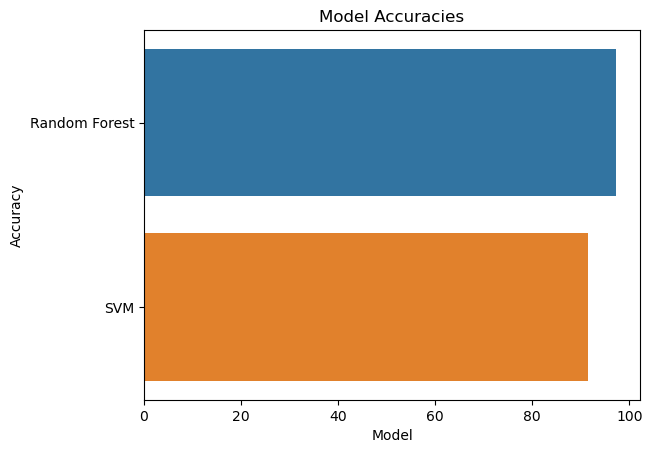

In [ ]:
# Extract model names and accuracies from the best_model dictionary
accuracies = list(best_model.values())
model_names = list(best_model.keys())

# Create a bar plot using seaborn
sns.barplot(x=accuracies, y=model_names)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()


In [ ]:
# Sort the dictionary items by values in descending order
sorted_items = sorted(best_model.items(), key=lambda x: x[1], reverse=True)

# Print the keys and values in descending order
for key, value in sorted_items:
    print(f"{key}: {value}")

Random Forest: 97.34219269102991
SVM: 91.47286821705426


In [ ]:
max_key = max(best_model, key=best_model.get)
max_value = best_model[max_key]

print(f"Key: {max_key}, Value: {max_value}")

Key: Random Forest, Value: 97.34219269102991


In [ ]:
import pickle
pickle.dump(RandomForest, open('modelCrop.pkl','wb'))

<h3> Using the model 🦾 </h3>

In [ ]:
def recommendation(N, P, K, pH, Rainfall, Temperature, feature_names, model, dataset):
    
    data = pd.DataFrame([[N, P, K, pH, Rainfall, Temperature]], columns=feature_names)
    # Use the model to make predictions
    fertilizer_prediction = model.predict(data)
    print("Predicted Fertilizer Index:", fertilizer_prediction)

    predicted_fertilizer = fertilizer_prediction[0]

    filtered_data = dataset[dataset['Fertilizer'] == predicted_fertilizer]
    if not filtered_data.empty:
        predicted_crop = filtered_data['Crop'].values[0]
        recommended_fertilizer = filtered_data['Fertilizer'].values[0]
    else:
        predicted_crop = "Unknown Crop"
        recommended_fertilizer = "Unknown Fertilizer"
    
    return predicted_fertilizer, predicted_crop, recommended_fertilizer